In [1]:
import pandas as pd
import re

def load_data():
    with open('data/doh_inspections.csv', 'r') as f:
        data = pd.read_csv(f, quotechar='"')
    data = data[~data['INSPECTION DATE'].isin(['01/01/1900'])]
    return data

def make_violation_dict(data):
     return dict(zip(data['VIOLATION CODE'], data['VIOLATION DESCRIPTION']))

In [2]:
data = load_data()

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [3]:
data

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/09/2015,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6,A,02/09/2015,12/02/2015,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,03/03/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2,A,03/03/2014,12/02/2015,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,10/10/2013,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,12/02/2015,Trans Fat / Second Compliance Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,09/11/2013,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,6,A,09/11/2013,12/02/2015,Cycle Inspection / Re-inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,09/11/2013,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,6,A,09/11/2013,12/02/2015,Cycle Inspection / Re-inspection
5,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,32,NaN,NaN,12/02/2015,Cycle Inspection / Initial Inspection
6,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,32,NaN,NaN,12/02/2015,Cycle Inspection / Initial Inspection
7,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,32,NaN,NaN,12/02/2015,Cycle Inspection / Initial Inspection
8,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,32,NaN,NaN,12/02/2015,Cycle Inspection / Initial Inspection
9,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,32,NaN,NaN,12/02/2015,Cycle Inspection / Initial Inspection


In [4]:
ids = set(zip(data['DBA'], data['BUILDING'], data['STREET'], data['ZIPCODE']))

In [5]:
len(ids)

24700

In [6]:
len(set(data['CAMIS']))

24787

In [8]:
from collections import Counter
Counter(data['CAMIS'])

Counter({50003968: 2,
         41484288: 39,
         50003970: 12,
         50003973: 16,
         50003976: 6,
         50003977: 8,
         50003978: 7,
         41353228: 13,
         41353218: 28,
         50003984: 31,
         41615382: 45,
         41680924: 27,
         41124425: 25,
         41418789: 31,
         41549862: 10,
         41091113: 29,
         41615409: 52,
         50014899: 3,
         41222198: 29,
         41680956: 11,
         41549885: 14,
         40370238: 29,
         40370239: 22,
         41549888: 33,
         50004033: 9,
         41418818: 14,
         41549891: 46,
         41156678: 31,
         41615431: 10,
         41353290: 20,
         50004043: 8,
         41109419: 26,
         41549903: 20,
         41615445: 13,
         41415537: 16,
         50004057: 43,
         41156699: 28,
         40512186: 9,
         41680991: 26,
         50004065: 39,
         41222245: 17,
         50004071: 8,
         50004075: 10,
         50004076: 3

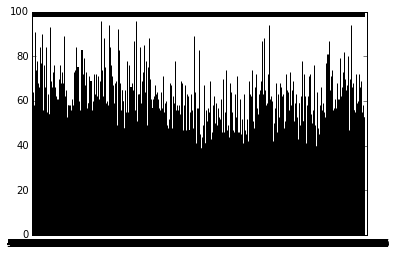

In [23]:
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*Counter(data['CAMIS']).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
def magic(s):
    